# Tasks 2020

## Machine Learning and Statistics

## Task 1. SQRT2

Write a Python function called sqrt2 that calculates and
prints to the screen the square root of 2 to 100 decimal places. Your code should
not depend on any module from the standard library or otherwise. You should
research the task first and include references and a description of your algorithm.

How to calculate SQRT2	

Solution adapted from [math.com](hhttp://www.math.com/school/subject1/lessons/S1U1L9EX.html#sm1)

Step 1: 1. Find the two perfect square numbers it lies between.
        1.4 squared =  1.96 and 1.5 squared = 2.25			
        Therefore SQRT 2 lies between 1.4 and 1.5.			
			
Step 2. Divide 2 by 1.4	=		                1.4285714286 (a)
			
Step 3. Average 1.4 and 1.4828571 (a) = 		1.4142857143 (b)
			
Step 4. Divide 2 by 1.4142857143 (b)  =			1.4141414141 (c)
			
Step 5. Average (b) and (c)           =         1.4142135642 (d)
			
Step 6. Divide 2 by (d):  			  =         1.4142135605 (e)
			
Step 7. Average (d) and (e)			  =         1.4142135624 (f)
			
Step 8. Divide 2 by (f)   			  =         1.4142135624 (g)
			
Step 9. Average (f) and (g)           =         1.4142135624 



### The Babylonian square-root algorithm
The iterative method is called the Babylonian method for finding square roots, or sometimes Hero's method. It was known to the ancient Babylonians (1500 BC) and Greeks (100 AD) long before Newton invented his general procedure.

Here's how it works. Suppose you are given any positive number S. To find the square root of S, do the following:

1. Make an initial guess. Guess any positive number x0.
1. Improve the guess. Apply the formula x1 = (x0 + S / x0) / 2. The number x1 is a better approximation to sqrt(S).
1. Iterate until convergence. Apply the formula xn+1 = (xn + S / xn) / 2 until the process converges. Convergence is achieved when the digits of xn+1 and xn agree to as many decimal places as you desire.

Let's use this algorithm to compute the square root of S = 2 to 100 decimal places.

An initial guess is x0 = 1.4.


### 1st Unsuccessful Attempt

In [1]:
def sqrt(s, guess):
    
    a = float(2)
    x = float(1.4)
    div = 0
    
    for i in range(10):
        est = format(x, '.100f')
        div = format(a / float(est), '.100f')
        
        #div = (a) / (est)
        newest= format((float(est) + float(div))/2,'.100f')
        x = float(newest)
        #print(div)
    
    print(newest)
    
    
sqrt(2, 1.4)

1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000


### Successful Attempt

In [29]:
def sqrtx(s, guess): 
# Calculate the square root of 2 using the Babylonian Method.    
    s = s * 10**100
  
    x = guess * 10**100
    
    
    while True:
        guess = x           
        newguess = (guess + (s / x) * 10**100) / 2
        
        # Improve the guess. Apply the formula x1 = (x0 + S / x0) / 2. The number x1 is a better approximation to sqrt(S).
        if newguess == guess:
        # Check if convergence is achieved when the digits of xn+1 and xn agree to as many decimal places as you desire.
            break
        else:
            x = newguess 
         
        
    ans = ("{:100.0f}".format( newguess))
   
    
    print("The sqrt(2) =",ans[0],".",ans[1:101])
    # slice string by converting it into an array and outputting the first element of the array,then decimal point, followed my the next 100 elements of the array wh
   

sqrtx(2, 1.4)

The sqrt(2) = 1 . 4142135623730952214093017858547657902953555641438782124185842940740828094528952769132495248707026944


### Verify Answer 

In [ ]:
from decimal import *
#getcontext().prec = 100
# Unlike floating point, the decimal module has a user alterable precision (defaulting to 28 places) 
# Change the precision to 100 decimal places: Adapted from https://docs.python.org/3/library/decimal.html

def sqrt2():
    getcontext().prec = 100
    # Change the precision to 100 decimal places: Adapted from https://docs.python.org/3/library/decimal.html
    getcontext().rounding = ROUND_UP
    # Round up the calculation when displaying 100 decimal places.
    a = Decimal(2)
    x = Decimal(1.4)
    div = 0

    for i in range(10):
        est = Decimal(x)
        div = Decimal(a) / Decimal(est)
        newest= (Decimal(est)+Decimal(div))/2
        x = newest
        
    print("The Square Root of 2 is:", x)

sqrt2()

### Comparison

## Task 2 - Chi-squared Test

November 2nd, 2020: The Chi-squared test for independence is a statistical
hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [4],
stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats
to verify this value and calculate the associated p value. You should include a short
note with references justifying your analysis in a markdown cell.

Occupation   | A | B | C | D | Total
-------------|---|---|---|---|------
White collar | 90| 60|104| 95|	349 
Blue collar	 | 30| 50| 51| 20|	151
No collar	 | 30| 40| 45| 35|	150
-------------|---|---|---|---|------
Total	     |150|150|200|150|	650


A common problem in applied machine learning is determining whether input features are relevant to the outcome to be predicted.

This is the problem of feature selection.

In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.

The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.

In this tutorial, you will discover the chi-squared statistical hypothesis test for quantifying the independence of pairs of categorical variables.

After completing this tutorial, you will know:

Pairs of categorical variables can be summarized using a contingency table.
The chi-squared test can compare an observed contingency table to an expected table and determine if the categorical variables are independent.
How to calculate and interpret the chi-squared test for categorical variables in Python.

### Pearson’s Chi-Squared Test
The Pearson’s Chi-Squared test, or just Chi-Squared test for short, is named for Karl Pearson, although there are variations on the test.

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X) pronounced “ki” as in kite.

Given the Sex/Interest example above, the number of observations for a category (such as male and female) may or may not the same. Nevertheless, we can calculate the expected frequency of observations in each Interest group and see whether the partitioning of interests by Sex results in similar or different frequencies.

The Chi-Squared test does this for a contingency table, first calculating the expected frequencies for the groups, then determining whether the division of the groups, called the observed frequencies, matches the expected frequencies.

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as:

degrees of freedom: (rows - 1) * (cols - 1)
1
degrees of freedom: (rows - 1) * (cols - 1)
In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.
For the test to be effective, at least five observations are required in each cell of the contingency table.

In [9]:
# contingency table (Adapted from Brownlee , 2018))
table = [[90, 60,104, 95],
         [30, 50, 51, 20],
         [30, 40, 45, 35]]
print(table)
# Calculate degrees of freedom (dof): (rows - 1) * (cols - 1)
print('dof=%d' % dof)

[[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]]
dof=6


In [11]:
# chi-squared test with similar proportions (Adapted from Brownlee , 2018))
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(table)

print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.2f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]
probability=0.950, critical=12.592, stat=24.57
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Python for Data 25: Chi-Squared Tests 

In [37]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [39]:
df2 = pd.DataFrame(np.array([[90, 60, 104, 95, 349 ],[30, 50, 51, 20, 151],[30, 40, 45, 35, 150],[150, 150, 200, 150, 650]]),
                   columns=['A', 'B', 'C','D', 'row_totals'],index=['White Collar','Blue Collar','No Collar', 'col_totals'])

observed = df2.iloc[0:3,0:4]   # Get table without totals for later use
df2

,A,B,C,D,row_totals
White Collar,90,60,104,95,349
Blue Collar,30,50,51,20,151
No Collar,30,40,45,35,150
col_totals,150,150,200,150,650


In [36]:
expected =  np.outer(df2["row_totals"][0:3],
                     df2.loc["col_totals"][0:4]) / 650

expected = pd.DataFrame(expected)

expected.columns = ['A', 'B', 'C','D']
expected.index = ['White Collar','Blue Collar','No Collar']

expected

,A,B,C,D
White Collar,80.538462,80.538462,107.384615,80.538462
Blue Collar,34.846154,34.846154,46.461538,34.846154
No Collar,34.615385,34.615385,46.153846,34.615385


In [41]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)


24.571202858582602


In [33]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=6)
print("P value")
print(p_value)

Critical value
12.591587243743977
P value
1.0


In [34]:
stats.chi2_contingency(observed= observed)

(7.169321280162059,
 0.518479392948842,
 8,
 array([[ 23.82 ,  11.16 ,  25.02 ],
        [ 61.138,  28.644,  64.218],
        [ 99.647,  46.686, 104.667],
        [ 15.086,   7.068,  15.846],
        [197.309,  92.442, 207.249]]))

The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

As expected, given the high p-value, the test result does not detect a significant relationship between the variables.

## Task 3 - Standard Deviation Function

The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).
However, Microsoft Excel has two different versions of the standard deviation
calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence

### 3.1 STDEV.P
The STDEV.P function is an Excel function used to calculate the population standard deviation. The function measures how much variance there is in a dataset of numbers compared to the average (mean) of the numbers in the dataset. The STDEV.P function is intended to be used to calculate the standard deviation of all of the elements from a data set. If dataset consists of a sample of the population, then the STDEV.S function should be used instead (Cheusava, 2020).

![STDEV.P Formula](images/STDEVP.png)

### 3.2 STDEV.S
STDEV.S is an Excel function used to calculate the standard deviation of a sample set of data. Standard deviation is a measure of how much variance there is in a sample set of numbers compared to the average (mean) of the sample. It's calulated by getting the square root of; the sum differences between the mean and its data points, squared; divided by the number of data point minus one to correct for bias (Adapted from Hall 2020). This correction for bias is known as Bessel’s Correction, or n-1.

According to Wikipedia, Bessel's correction makes use of n − 1 instead of n in the formula for sample standard deviation. This method is used to partially correct the bias in the estimation of the population standard deviation. 
![STDEV.S Formula](images/STDEVS.png)



### 3.3 Differences between STDEV.P and STDEV.S

STDEV.P | STDEV.S
------------ | -------------
Data corresponds to the entire population | Data corresponds to a sample of the entire population
The standard deviation is calculated using the "n" method | The standard deviation is calculated using the "n-1" method
The standard deviation is calculated using the "n" method | The standard deviation is calculated using the "n-1" method

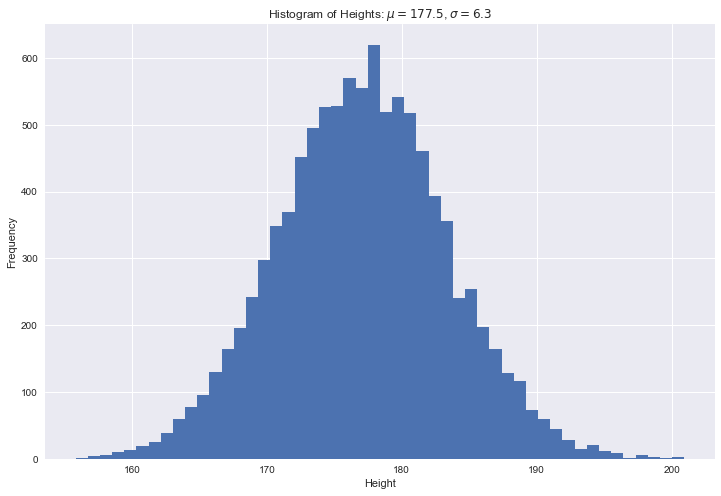

In [69]:
# STDEV.P Simulation

# Create Dataset - this will simulate entire population of a dataset - adapted from Ebner 2019.

# Import NumPy Library as np
import numpy as np
import matplotlib.pyplot as plt


# Generate ndarray of "heights" drawn from a sample of 10000 random numbers taken from a normal distribution 
# adapted from https://www.sharpsightlabs.com/blog/numpy-random-normal/

# Define paramters
loc = 177  # refers to mean adult male height in cms
scale = 6.3 # refers to height standard deviation in cms
size = 10000 # to generate 10000 values

# Create an array using defined parameters using random.normal() function
heights = [(np.random.normal(loc, scale , size))]
pop = np.random.normal(loc, scale , size)

#plot histogram using this data
num_bins = 50 #number of bins used for histogram
count, bins, ignored = plt.hist(heights, num_bins, density = False) 

# Plot Parameters
plt.style.use('seaborn') # use seaborn theme
plt.rcParams['figure.figsize'] = (12, 8) # resize the figure
plt.xlabel('Height') # Create Label for x Axis
plt.ylabel('Frequency') # Create Label for y Axis

# Create Title for Plot - adding annotation for mean and standard deviation
plt.title('Histogram of Heights: $\mu=177.5$, $\sigma=6.3$')
plt.show() # show plot

In [70]:
# Calculate the standard deviation of array 'x' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
# Formula: Square root of; the sum differences between the mean and its data points, squared; 
#                          divided by the number of data points (Adapted from Hall 2020)
stdevp = np.sqrt(np.sum((pop - np.mean(pop))**2)/len(pop))
print('STDEV.P: ',stdevp)

STDEV.P:  6.307240097466423


In [71]:
# STDEV.S # Simulation 1 - Small Sample

# Create random sample from dataset 'pop' to used with STDEV.S Function adapted from Geeksforgeeks 2018 
# Generate 50 random integers from dataset 'x'
sample1 = np.random.choice(pop,10)
print("\n Array 'sample1' filled with sample of 10 random numbers from numpy array 'pop' : \n", sample1); # print array 


 Array 'sample1' filled with sample of 10 random numbers from numpy array 'pop' : 
 [177.59858102 173.599633   174.21173618 172.13215359 180.31409269
 174.03116723 176.73082279 172.97762697 170.92750195 173.6210296 ]


In [72]:
# Calculate the standard deviation of array 's' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x-1))
# Formula: Square root of; the sum differences between the mean and its data points, squared; 
#                          divided by the number of data points…minus one to correct for bias (Adapted from Hall 2020)
stdevs = np.sqrt(np.sum((sample1 - np.mean(sample1))**2)/(len(sample1)-1))
print('STDEV.S on Small Sample: ', stdevs)

STDEV.S on Small Sample:  2.805227351521532


In [73]:
# Compare STDEV.P & STDEV.S Simulation 1 - Small Sample

# Use sample data and apply STDEV.P formula
# Calculate the standard deviation of array 's' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
stdevp2 = np.sqrt(np.sum((sample1 - np.mean(sample1))**2)/len(sample1))
print('STDEV.P: ',stdevp2,' STDEV.S: ', stdevs, ' Difference: ', stdevs-stdevp2)


STDEV.P:  2.6612723356229546  STDEV.S:  2.805227351521532  Difference:  0.14395501589857718


In [74]:
# STDEV.S  Simulation 2 - Large Sample

# Create ramdom sample from dataset 'x' to used with STDEV.S Function adapted from Geeksforgeeks 2018 
# Generate 200 random integers from dataset 'x'
sample2 = np.random.choice(pop,100)
print("\n Array 'sample2' filled with sample of 100 random numbers from numpy array 'pop' : \n", sample2); # print array  


 Array 'sample2' filled with sample of 100 random numbers from numpy array 'pop' : 
 [198.0651643  173.61463226 168.6972947  176.18018443 182.10255669
 171.97588545 172.76689915 173.62030728 184.95563303 188.92970051
 179.78361542 186.1467063  186.04317695 183.57257412 165.11758267
 179.85213706 175.71088001 170.17495332 176.16121788 176.70039687
 172.4539789  167.15771409 186.36958213 170.90980171 170.78730127
 168.40922197 178.56522509 158.16073521 174.63001224 171.15976647
 176.85783815 181.11435024 168.0467116  183.74675101 175.85717041
 164.18395007 181.27258785 181.62641872 175.68336189 179.58832857
 170.90980171 171.36681808 170.97797294 177.92046064 168.05187044
 182.22865105 173.17752956 178.5993939  176.86183459 174.1257698
 170.19041475 177.89068908 174.08195341 176.4244569  179.5610862
 181.62641872 183.97878317 182.40293475 178.74722656 181.18474635
 175.2411739  182.92429434 189.30060635 177.68668518 174.26981399
 167.52124895 178.69541452 181.77267313 179.81980567 177.2

In [75]:
# Calculate the standard deviation of array 's2' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x-1))
stdevs2 = np.sqrt(np.sum((sample2 - np.mean(sample2))**2)/(len(sample2)-1))
print('STDEV.S on Large Sample: ', stdevs2)

STDEV.S on Large Sample:  6.368861845449242


In [28]:
stdevp = np.sqrt(np.sum((s - np.mean(s))**2)/100)
stdevs = np.sqrt(np.sum((s - np.mean(s))**2)/99)
print('STDEV.P: ',stdevp,'STDEV.S: ', stdevs)

STDEV.P:  294.13395230744777 STDEV.S:  295.61574482063463


In [76]:
# Compare STDEV.P & STDEV.S Simulation 2 - Large Sample

# Use sample data and apply STDEV.P formula
# Calculate the standard deviation of array 'sample2' using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
stdevp3 = np.sqrt(np.sum((sample2 - np.mean(sample2))**2)/len(sample2))
print('STDEV.P: ',stdevp3,' STDEV.S: ', stdevs2, ' Difference: ', stdevs2-stdevp3)

STDEV.P:  6.336937524889679  STDEV.S:  6.368861845449242  Difference:  0.03192432055956296


### 3.4 Conclusions
* As the sample size increases the difference between STDEV.P and STDEV.S reduces, when calculated using the same sample dataset.  
* In both scenarios the sample standard deviation was greater than the population standard deviation when calculated using the same sample dataset. 
* Proof that increasing sample size increases standard deviation, which converges to the true population standard deviation. Bessel's correction helps smaller samples get larger standard deviations than they would otherwise, hence n-1.


## References:

1. Wikipedia contributors *Chi-squared test* [Online] Available at:https://en.wikipedia.org/wiki/Chi-squared_test [Accessed 2 Nov 2020]
1. Brownlee, J (2018) *A Gentle Introduction to the Chi-Squared Test for Machine Learning* [Online] Available at:https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ [Accessed 02 Nov 2020]
1. Hamel, G, J (2018) *Python for Data 25: Chi-Squared Tests* [Online] Available at:https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests [Accessed 02 Nov 2020]
1. Bruns, D (2012-2020) *Excel STDEV.S Function* [Online] Available at:https://exceljet.net/excel-functions/excel-stdev.p-function3 [Accessed 23 Nov 2020]
1. Cheusava, S (2020) *How to calculate standard deviation in Excel* [Online] Available at:https://www.ablebits.com/office-addins-blog/2017/05/31/calculate-standard-deviation-excel/ [Accessed 23 Nov 2020]
1. Ebner, J (2019) *HOW TO USE NUMPY RANDOM NORMAL IN PYTHON* [Online] Available at: https://www.sharpsightlabs.com/blog/numpy-random-normal/  [Accessed 23 Nov 2020]
1. Geeksforgeeks (2018) *Python Numbers | choice() function* [Online] Available at:https://www.geeksforgeeks.org/python-numbers-choice-function/ [Accessed 23 Nov 2020]
1. Hall, B (2020) *The Reasoning Behind Bessel’s Correction: n-1* [Online] Available at:https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9 [Accessed 23 Nov 2020]
1. Wikipedia contributors (2020) *Bessel's correction* [Online] Available at:https://en.wikipedia.org/wiki/Bessel%27s_correction [Accessed 23 Nov 2020]